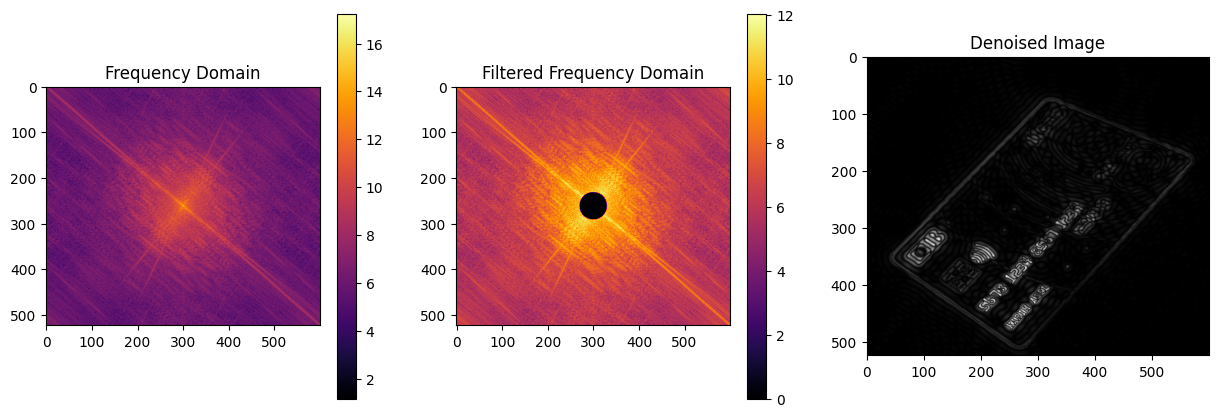

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('13 - Matozbot el camera ya Kimo.jpg', cv2.IMREAD_GRAYSCALE)

# Perform FFT
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Visualize the frequency domain
magnitude_spectrum = np.log(np.abs(fshift) + 1)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Frequency Domain')
plt.imshow(magnitude_spectrum, cmap='inferno')  # Use a color map
plt.colorbar()

# Create a mask with a low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
radius = 30  # Adjust radius to control the extent of filtering
mask = np.ones((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 0, thickness=-1)

# Apply the mask
fshift_filtered = fshift * mask

# Visualize the filtered frequency domain
magnitude_spectrum_filtered = np.log(np.abs(fshift_filtered) + 1)
plt.subplot(1, 3, 2)
plt.title('Filtered Frequency Domain')
plt.imshow(magnitude_spectrum_filtered, cmap='inferno')  # Use a color map
plt.colorbar()

# Inverse FFT to get the image back
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Convert to uint8
img_back = np.uint8(img_back)

# Display the result
plt.subplot(1, 3, 3)
plt.title('Denoised Image')
plt.imshow(img_back, cmap='gray')

plt.show()
